In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

import dynamic_XAS_visualization as dxas

%reload_ext autoreload
%autoreload 2

In [11]:
font = {'family' : 'arial',
        'weight' : 'normal',
        'size'   : 8}


mpl.rc('font', **font)

In [2]:
data = pd.read_csv(r'G:\My Drive\UW Research\fr-XAS Feb 2018\XANES\FRXAS_700C_10__XANES_OCV_csv_3.csv')

## Get IV data to find overpotentials

In [44]:
n250_data = pd.read_csv(r'G:\\My Drive\\UW Research\\fr-XAS Feb 2018\\EIS_IV\\Good EIS Files\\Txt Files\\Galvanostat_n250mV_DUSB0_C01.txt', skiprows=57, sep='\t')
p250_data = pd.read_csv(r'G:\\My Drive\\UW Research\\fr-XAS Feb 2018\\EIS_IV\\Good EIS Files\\Txt Files\\Galvanostat_p250mV andEIS_02_CA_DUSB0_C01.txt', skiprows=57, sep='\t')

R_ohm = 28

j_n250 = n250_data.iloc[500:, 3].mean()
j_p250 = p250_data.iloc[500:, 3].mean()

eta_p = (.250 - R_ohm * j_p250/1000) * 1000
eta_n = (-.250 - R_ohm * j_n250/1000) * 1000

In [3]:
data.columns = [col.split(' ')[-1] for col in data.columns]
data.columns

Index(['energy', 'FRXAS_700C_10__XANES_OCV_csv',
       'FRXAS_700C_10__XANES_n250mV_csv', 'FRXAS_700C_10__XANES_p250mV_csv'],
      dtype='object')

In [4]:
energies = data['energy'].to_numpy()
Irs = data.iloc[:, 1:].to_numpy()

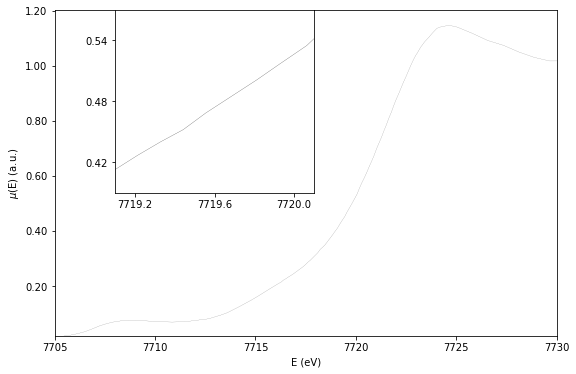

In [5]:
inset_dict = {'start_energy':7719, 'stop_energy':7720.5, 'x1_adj': 0, 'x2_adj': 0, 'x_interval':0.5, 'y1_adj': 0,
                      'y2_adj': -0.05, 'y_interval': 0.06, 'x_lateral': 0.1, 'y_vertical':0}

fig = dxas.format_XANES(energies, Irs[:, 0, None], [0], inset_dict=inset_dict, colorbar=False, )

# plt.savefig('Plots/SS_OCV_XANES.png', bbox_inches='tight', dpi=300)

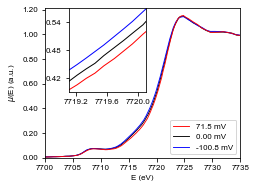

In [60]:
inset_dict = {'start_energy':7719, 'stop_energy':7720.5, 'x1_adj': 0, 'x2_adj': 0, 'x_interval':0.5, 'y1_adj': 0,
                      'y2_adj': -0.05, 'y_interval': 0.06, 'x_lateral': 0.1, 'y_vertical':0}

fig = dxas.format_XANES(energies, Irs, [0, -.250, .250], inset_dict=inset_dict, startE=7700, stopE=7735, size=(3.5, 2.75), colorbar=False)
fig.axes[0].set_ylim(0, 1.21)

handles,_ = fig.axes[0].get_legend_handles_labels()
handles = [handles[i] for i in [2, 0, 1]]
leg = fig.axes[0].legend(handles, (f'{eta_p:.1f} mV', '0.00 mV', f'{eta_n:.1f} mV'), loc='lower right')
plt.savefig(r'Plots\\XANES\\SS_Polarized_XANES.svg', bbox_inches='tight', dpi=300)

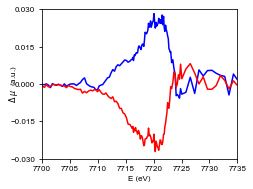

In [54]:
inset_dict = {'start_energy':7719, 'stop_energy':7720.5, 'x1_adj': 0, 'x2_adj': 0, 'x_interval':0.5, 'y1_adj': 0,
                      'y2_adj': -0.05, 'y_interval': 0.06, 'x_lateral': 0.1, 'y_vertical':0}

fig = dxas.format_diffXANES(energies, Irs, np.array([0, -.250, .250]), size=(3.5, 2.75), colorbar=False)
handles,_ = fig.axes[0].get_legend_handles_labels()

handles = [handles[i] for i in [0, 1]]
# leg = fig.axes[0].legend(handles, (f'{eta_p:.1f} mV', f'{eta_n:.1f} mV'), loc='lower right')
plt.savefig(r'Plots\\XANES\\SS_Polarized_diffXANES.svg', bbox_inches='tight', dpi=300)

In [29]:
dat = pd.read_csv(r'E:\UW Research\fr-XAS Feb 2018\Energy Spectrum_5Hz\Txt Files\E83.txt', sep='\t', header=None)

In [30]:
dat.columns = ['t', 'Io', 'If', 'J', 'V']

Eta max 0.31274240000000003 V max 0.19956600000000002


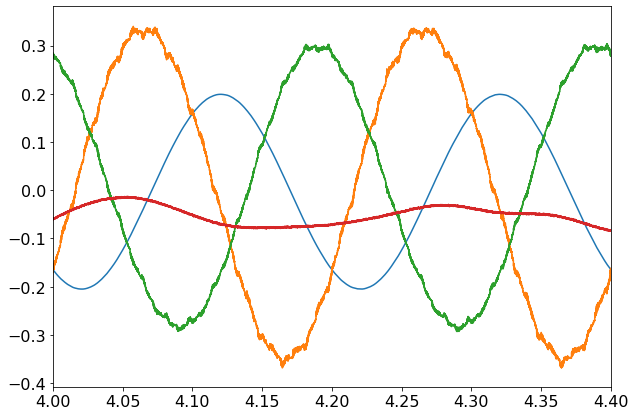

In [63]:
ROhm = 70
stop = 400000

Eta = -(dat['V'] +dat['J'] / 100 * ROhm)
Ir = dat['If'] / dat['Io']
Ir = Ir - Ir.mean()
print(f'Eta max {np.max(Eta)} V max', np.max(dat['V']))
_, ax = plt.subplots(figsize=(10,7))

ax.plot(dat['t'][:stop], dat['V'][:stop])
ax.plot(dat['t'][:stop], dat['J'][:stop])
ax.plot(dat['t'][:stop], Eta[:stop])
ax.plot(dat['t'][:stop], Ir[:stop]*5)

ax.set_xlim(4, 4.4)
# ax.set_ylim(-.36, .36)
plt.show()